# Semana 1 del curso intensivo de Cosmología  - CMB

Del 25 de marzo al 4 de abril de 2025 - DF-FCFyN-UBA

Prof. Claudia Scóccola
Departamento de Física, Facultad de Ciencias Físicas y Matemáticas, Universidad de Chile

---

## Práctica 3

---

In [1]:
import camb
import pysm3
import pysm3.units as u
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt


#### Ejercicio 0

Explorar superficialmente los tutoriales de la carpeta CMB/pysm_notebooks/

Tenga como referencia estos tutoriales para realizar los ejercicios de la práctica.

#### Ejercicio 1

Utilice pysm para generar un mapa de CMB solamente. Elija resolución angular, y parámetros cosmológicos. Compare con el mapa que generó en la práctica 1, con los mismos parámetros y resolución (deberá guardar el mapa a disco, y leerlo en este notebook, para eso deberá usar las herramientas de healpy apropiadas). Deberá ver si es posible elegir el mismo seed.

Compare haciendo la diferencia de ambos mapas. A que se deben? Es posible que no todos los parámetros por defecto sean idénticos. Si los mapas son diferentes, y no sabe de donde viene la diferencia, esto le enseña que a veces hay parámetros fijados en algún valor de referencia que no es tan obvio a primera vista.

Práctica 3: CMB con pysm3


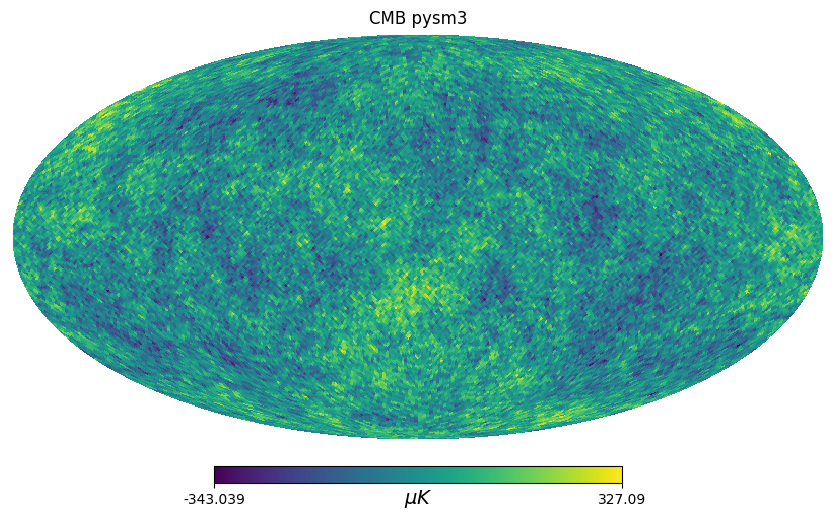

------
Práctica 1: CMB con CAMB


/tmp/ipykernel_38320/1095909886.py:31: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  map_cmb_prac1 = hp.alm2map(alm, nside, fwhm=radians, verbose=False)


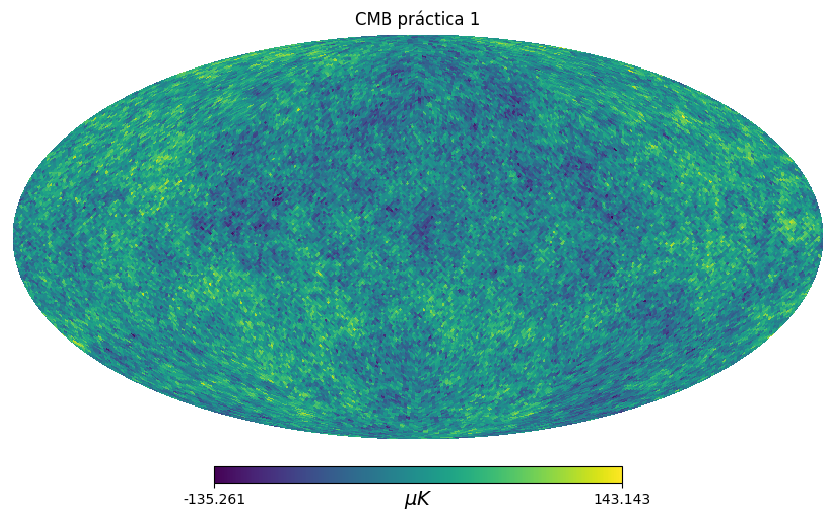

------


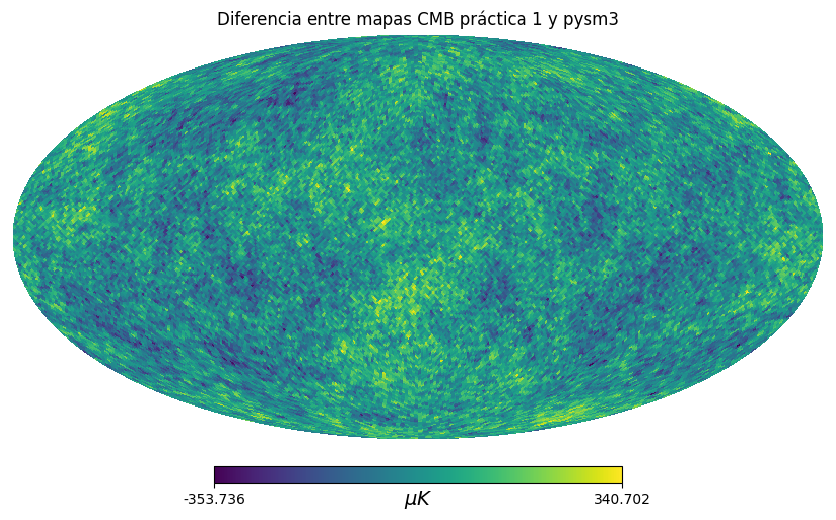

In [2]:
#práctica 1 vs pysm3:
seed = 42
nside= 64
lmax= 1024 #viene de la práctica 1


#práctica 3:
print('Práctica 3: CMB con pysm3')
config = {
    "c1": {
        "seed": seed, 
        "cosmology": "planck2015",
        lmax: lmax
        
    }
}
sky = pysm3.Sky(nside=nside, preset_strings=["c1"], component_config=config)


map_cmb_prac3 = sky.get_emission(100 * u.GHz)  # Sin output_unit
map_cmb_prac3_microK = map_cmb_prac3.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(100*u.GHz)) #a microkelvin
hp.mollview(map_cmb_prac3_microK[0], title="CMB pysm3", unit="$\mu K$")
plt.show()

print('------')

#práctica 1:
print('Práctica 1: CMB con CAMB')
alm = np.load('a_lm.npy')
radians = np.radians(0.5) #30 arcmin
map_cmb_prac1 = hp.alm2map(alm, nside, fwhm=radians, verbose=False)

hp.mollview(map_cmb_prac1, unit="$\mu K$", title= 'CMB práctica 1')
plt.show()

print('------')
#diferencia entre ambos mapas:
map_diff = map_cmb_prac3_microK[0].value - map_cmb_prac1
hp.mollview(map_diff, unit="$\mu K$", title='Diferencia entre mapas CMB práctica 1 y pysm3')
plt.show()



Se ve bastante diferencia entre ambos mapas. No sé si es normal que la diferencia sea del mismo orden de magnitud que el mapa en si. Me hace pensar que establecí algun parámetro distinto y no me estoy dando cuenta cual (el nside y el lmax seguro que son los mismos) y que no es una diferencia debido a que los parámetros cosmológicos no son idénticos; pero no lo sé.

#### Ejercicio 2:

Utilice pysm para generar un mapa de CMB + polvo. Qué opciones de modelo de polvo ofrece el paquete pysm? Elija el modelo más simple, y alguna frecuencia particular.

Utilice una semilla (seed) determinada, así puede generar el mismo CMB en otro ejercicio para realizar comparaciones.

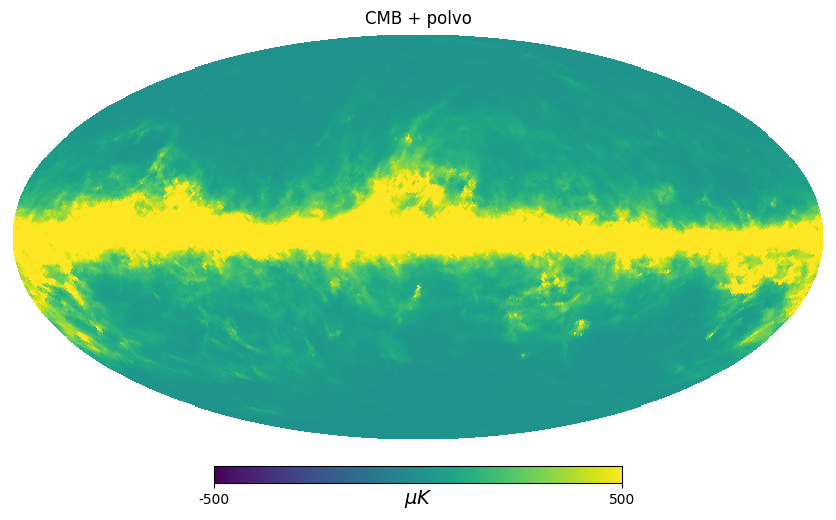

In [3]:
seed = 42
nside = 64
lmax = 1024

# Configuración para CMB y polvo (modelo más simple: d1)
config = {
    "c1": {"seed": seed, "cosmology": "planck2015", "lmax": lmax},
    "d1": {"seed": seed, "lmax": lmax, "nside": nside}
}

dust_config = {'d0': {'seed': seed, 'lmax': lmax, 'nside': nside}}
# Crear el cielo con CMB + polvo
# sky = pysm3.Sky(nside=nside, preset_strings=["c1", "d1"], component_config=config)
sky = pysm3.Sky(nside=nside, preset_strings=['d0'], component_config=dust_config)

freq = 200 * u.GHz
mapa = sky.get_emission(freq) #get_emission devuelve un mapa de Stokes I, Q, U
mapa_microK = mapa.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(freq))

# Graficar el mapa total (Stokes I)
hp.mollview(mapa_microK[0], title="CMB + polvo", unit="$\mu K$", min=-500, max=500)
plt.show()

#### Ejercicio 3:

Ahora utilice un modelo de polvo más complejo y la misma realización de CMB (mismo seed) para generar un mapa.

Que diferencias cualitativas encuentra respecto del mapa anterior?

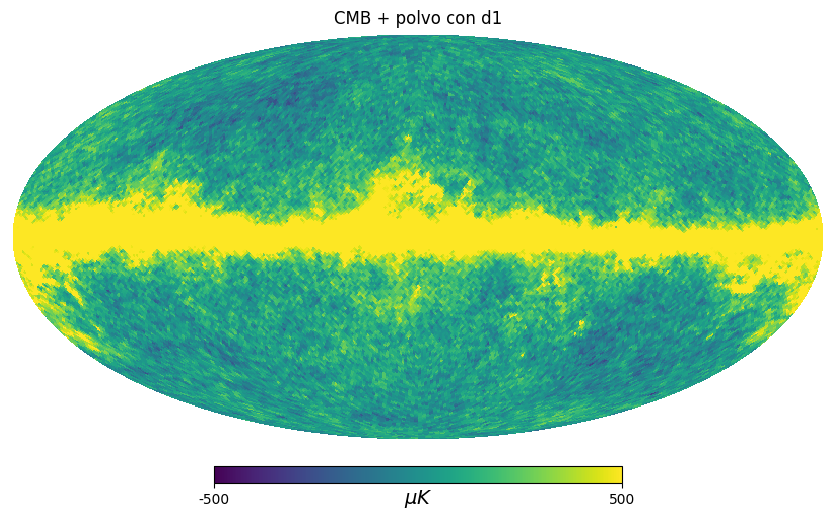

In [4]:
#uso el de d1:

seed = 42
nside = 64
lmax = 1024

# Configuración para CMB y polvo (modelo más simple: d1)
config = {
    "c1": {"seed": seed, "cosmology": "planck2015", "lmax": lmax},
    "d1": {"seed": seed, "lmax": lmax, "nside": nside}
}

dust_config = {'d0': {'seed': seed, 'lmax': lmax, 'nside': nside}}
# Crear el cielo con CMB + polvo
sky = pysm3.Sky(nside=nside, preset_strings=["c1", "d1"], component_config=config)
# sky = pysm3.Sky(nside=nside, preset_strings=['d0'], component_config=dust_config)

freq = 200 * u.GHz
mapa = sky.get_emission(freq) 
mapa_microK = mapa.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(freq))
hp.mollview(mapa_microK[0], title="CMB + polvo con d1", unit="$\mu K$", min=-500, max=500)
plt.show()

Cualitativamente se ve que con un modelo más complejo hay más anisotropías y están menos localizadas en el 'ecuador' de la esfera celeste.

#### Ejercicio 4:

Repita el ejercicio 2 y 3, pero haciendo realizaciones a distintas frecuencias. Cómo cambia el aspecto de la emisión del polvo para distintas frecuencias? Por qué?

Ve diferencias entre los distintos modelos de polvo?

Que gráfico se le ocurre hacer para estudiar la dependencia de la intensidad de la emisión del polvo, en función de la frecuencia observada?

Generando mapa para 50 GHz


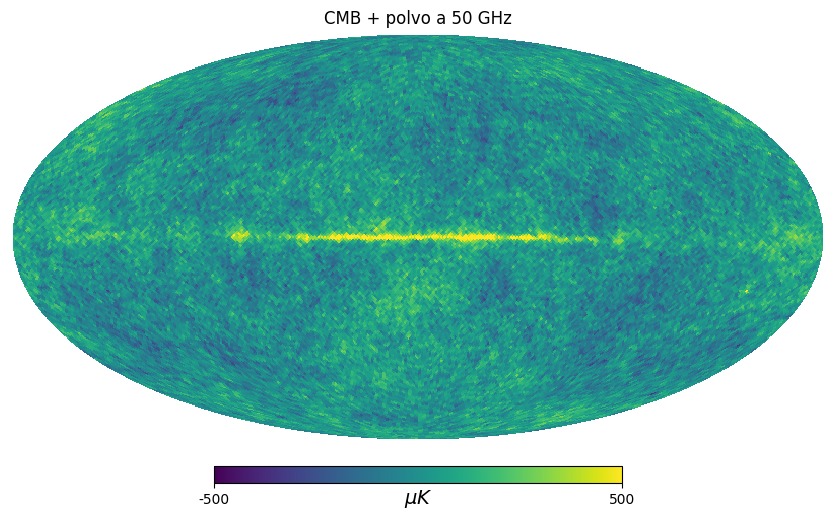

------

Generando mapa para 100 GHz


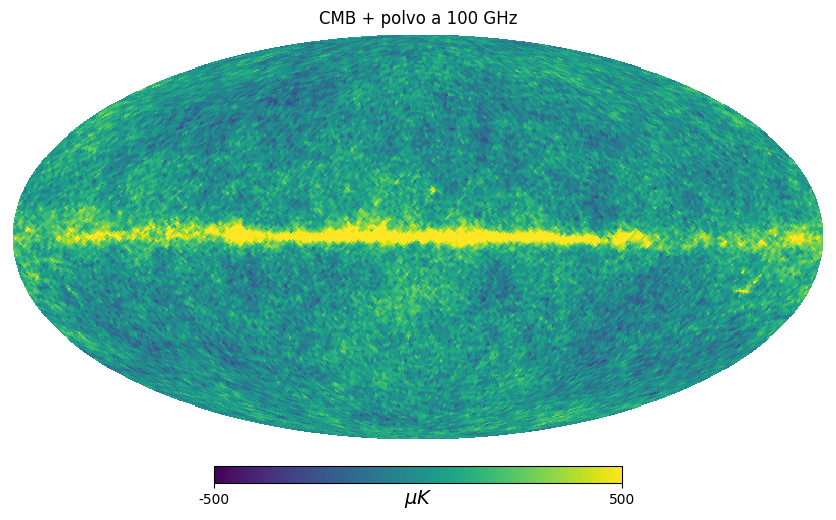

------

Generando mapa para 150 GHz


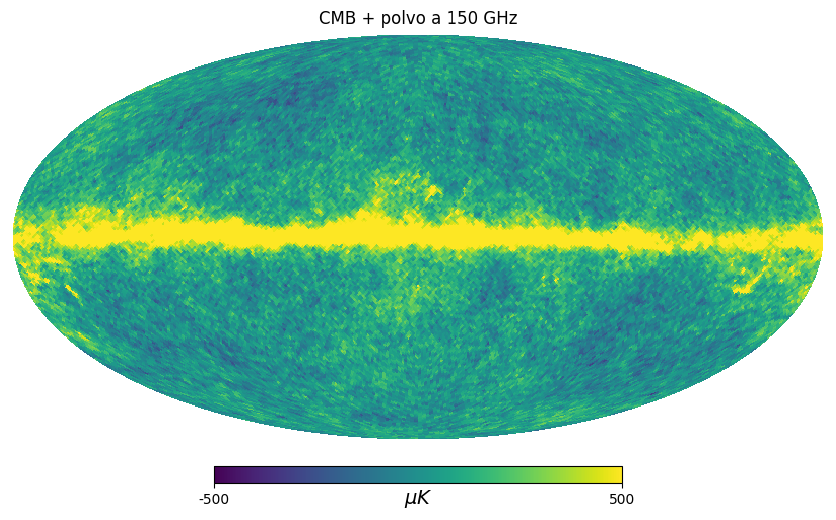

------

Generando mapa para 200 GHz


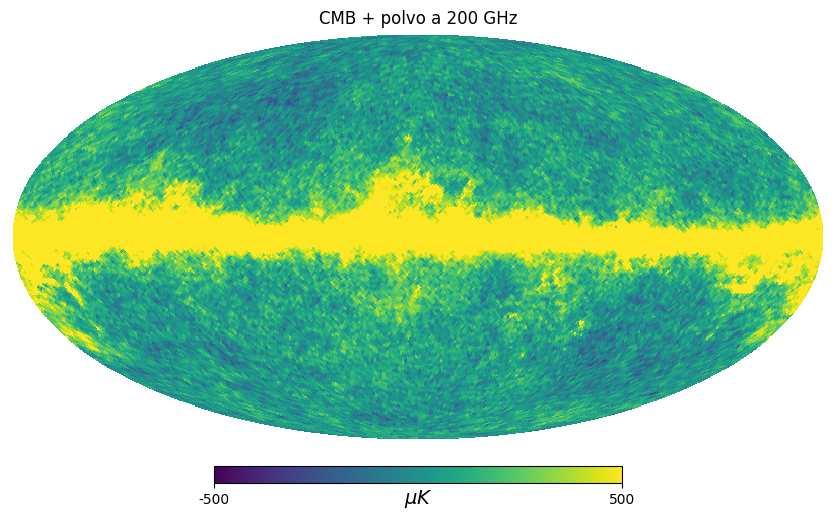

------



In [5]:
frecuencias = [50 * i for i in range(1,5)]  # en GHz
for freq in frecuencias:
    print(f"Generando mapa para {freq} GHz")
    mapa = sky.get_emission(freq * u.GHz)
    mapa_microK = mapa.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(freq * u.GHz))
    hp.mollview(mapa_microK[0], title=f"CMB + polvo a {freq} GHz", unit="$\mu K$", min=-500, max=500)
    plt.show()
    print('------')
    print('')

A medida que se aumenta la frecuencia, aumenta el polvo. Posible gráfico: intensidad media (+-std) vs frec. Se ve a ojo una relación exponencial.

/tmp/ipykernel_38320/2911236358.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


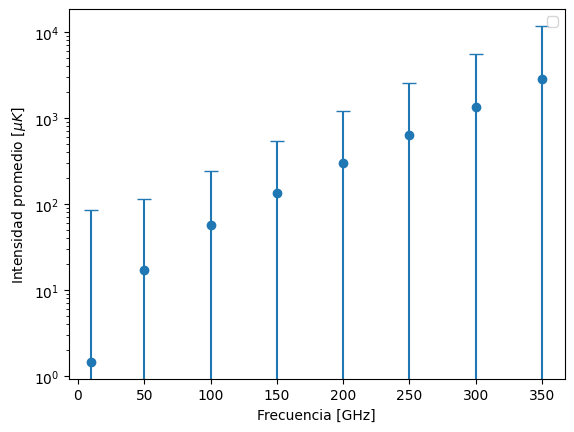

In [6]:

frecuencias = [10]+ [50 * i for i in range(1, 8)]  # en GHz
intensidades = []
stds = []
for freq in frecuencias:
    mapa = sky.get_emission(freq * u.GHz)
    mapa_microK = mapa.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(freq * u.GHz))
    intensidad_media = np.mean(mapa_microK[0].value)
    std_dev = np.std(mapa_microK[0].value)
    intensidades.append(intensidad_media)
    stds.append(std_dev)
#error bars
plt.errorbar(frecuencias, intensidades, yerr=stds, fmt='o', capsize=5)
plt.legend()
plt.xlabel("Frecuencia [GHz]")
plt.ylabel("Intensidad promedio [$\mu K$]")
#logscale in y
plt.yscale('log')
plt.show()


#### Ejercicio 5:

Utilice pysm para generar un mapa de CMB + sincrotrón a distintas frecuencias. Qué opciones de modelo ofrece pysm?

En que se diferencia la emisión de sincrotrón de la del polvo? Cual es más relevante a altas frecuencias y a bajas frecuencias?



Generando mapa para 10 GHz con sincrotrón


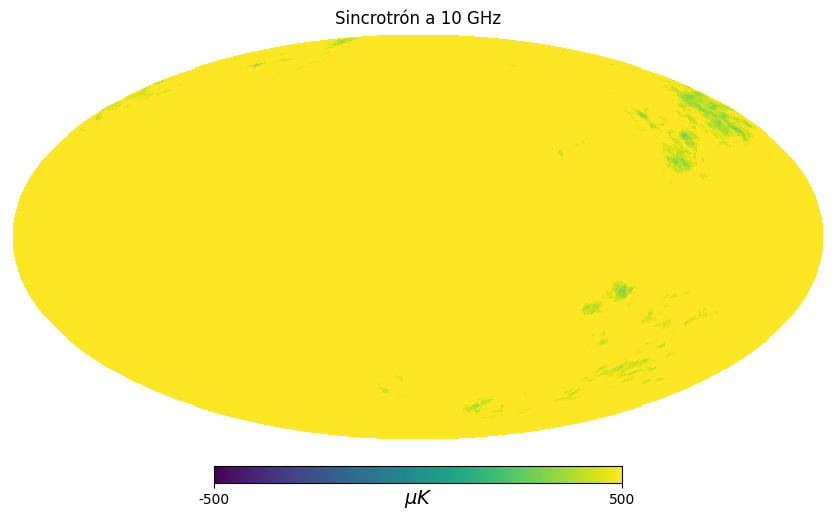

------

Generando mapa para 50 GHz con sincrotrón


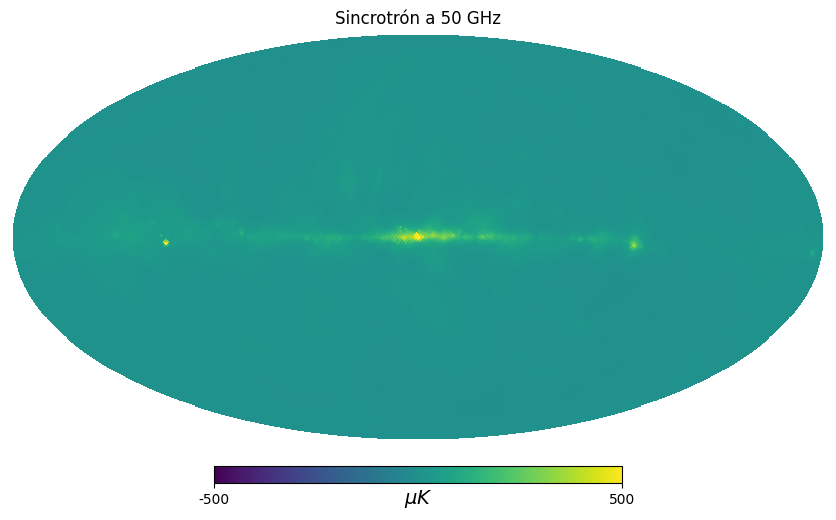

------

Generando mapa para 100 GHz con sincrotrón


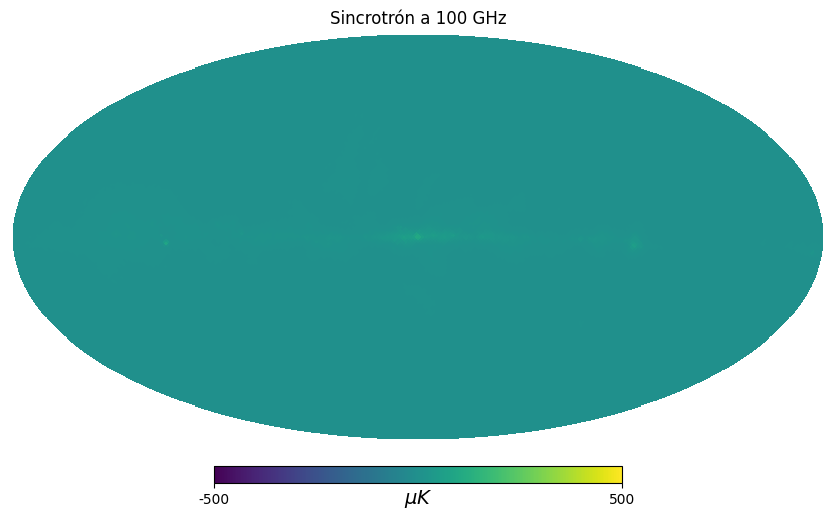

------

Generando mapa para 150 GHz con sincrotrón


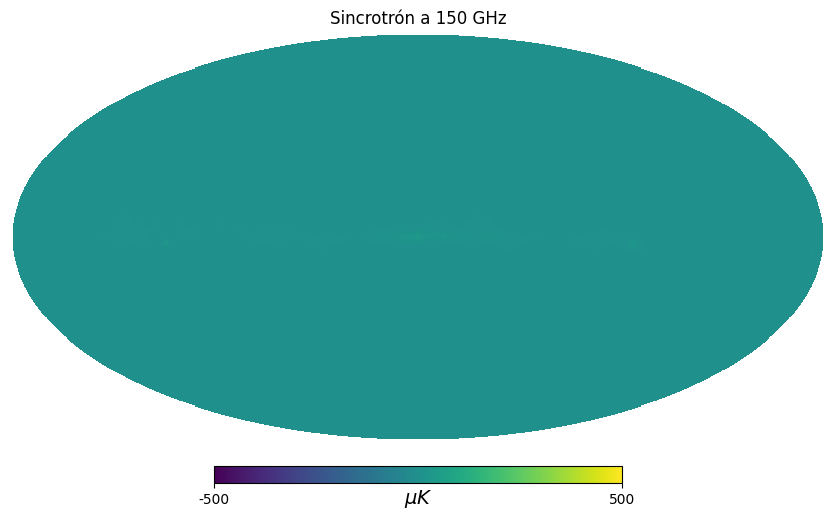

------

Generando mapa para 200 GHz con sincrotrón


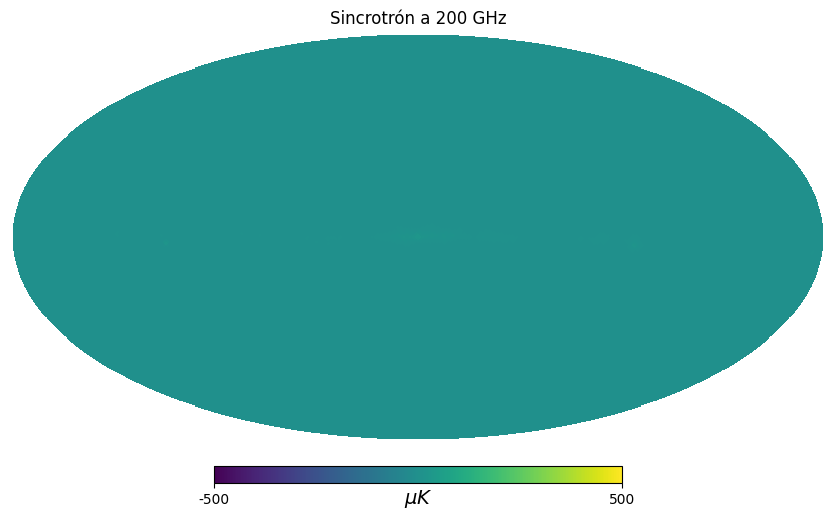

------

Generando mapa para 250 GHz con sincrotrón


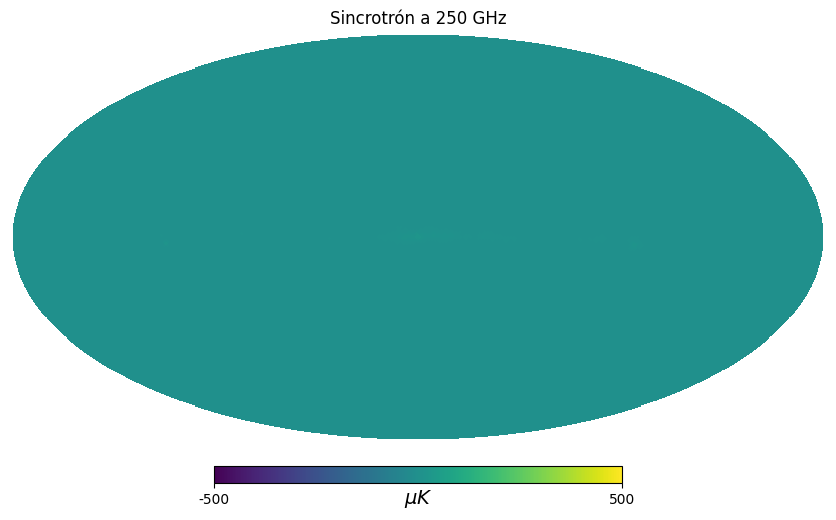

------

Generando mapa para 300 GHz con sincrotrón


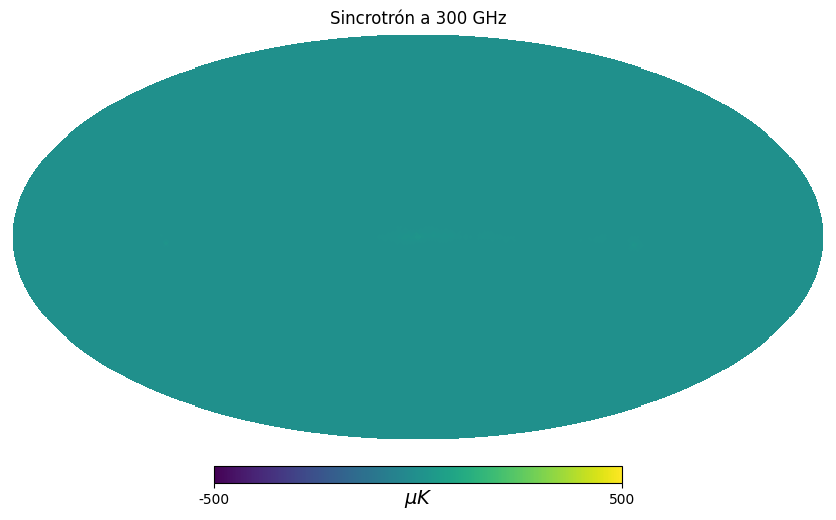

------

Generando mapa para 350 GHz con sincrotrón


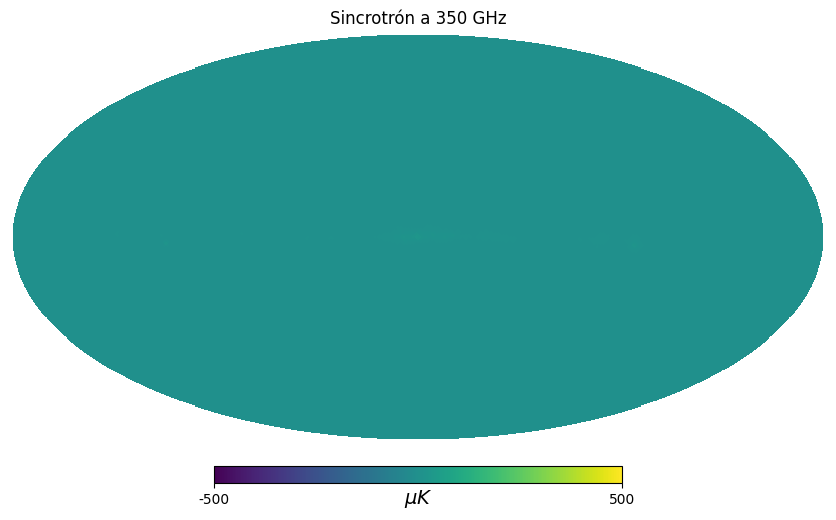

------



In [7]:
#cmb + sincrotrón

frecuencias = [10]+ [50 * i for i in range(1, 8)]  # en GHz
for freq in frecuencias:
    print(f"Generando mapa para {freq} GHz con sincrotrón")
    __sky = pysm3.Sky(nside=nside, preset_strings=["s1"]) #s1 es el mas simple
    mapa_sincro = __sky.get_emission(freq * u.GHz)
    mapa_sincro_microK = mapa_sincro.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(freq * u.GHz))
    hp.mollview(mapa_sincro_microK[0], title=f"Sincrotrón a {freq} GHz", unit="$\mu K$", min=-500, max=500)
    plt.show()
    print('------')
    print('')

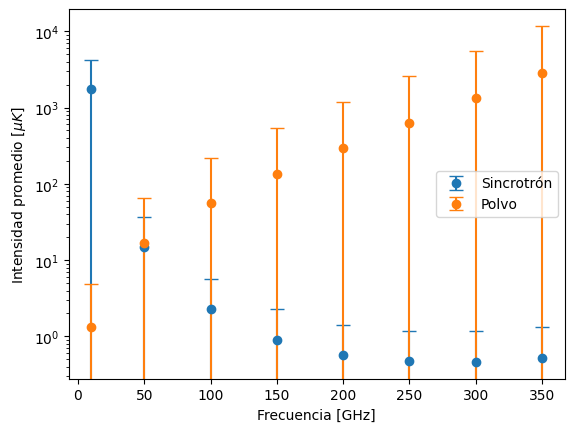

In [8]:
#plot intensidad vs frecuencia para sincrotrón y para polvo
intensidades_sincro = []
intensidades_polvo = []
stds_sincro = []
stds_polvo = []

for freq in frecuencias:
    __sky = pysm3.Sky(nside=nside, preset_strings=["s1"]) #s1 es el mas simple
    mapa_sincro = __sky.get_emission(freq * u.GHz)
    mapa_sincro_microK = mapa_sincro.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(freq * u.GHz))
    intensidad_media_sincro = np.mean(mapa_sincro_microK[0].value)
    std_dev_sincro = np.std(mapa_sincro_microK[0].value)
    intensidades_sincro.append(intensidad_media_sincro)
    stds_sincro.append(std_dev_sincro)

    _sky = pysm3.Sky(nside=nside, preset_strings=["d1"]) #d1 es el mas simple
    mapa_polvo = _sky.get_emission(freq * u.GHz)
    mapa_polvo_microK = mapa_polvo.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(freq * u.GHz))
    intensidad_media_polvo = np.mean(mapa_polvo_microK[0].value)
    std_dev_polvo = np.std(mapa_polvo_microK[0].value)
    intensidades_polvo.append(intensidad_media_polvo)
    stds_polvo.append(std_dev_polvo)
#plot
plt.errorbar(frecuencias, intensidades_sincro, yerr=stds_sincro, fmt='o', label='Sincrotrón', capsize=5)
plt.errorbar(frecuencias, intensidades_polvo, yerr=stds_polvo, fmt='o', label='Polvo', capsize=5)
plt.legend()
plt.xlabel("Frecuencia [GHz]")
plt.ylabel("Intensidad promedio [$\mu K$]")
plt.yscale('log')
plt.show()

se ve como a menores frecs, el polvo es más relevante y que sucede lo contrario para altas frecs

#### Ejercicio 6:

Estudie las unidades en las que se dan los mapas. Convierta un mapa de intensidad en MJy/sr a unidades de temperatura CMB (µK) usando la función `convert_units()` de PySM.


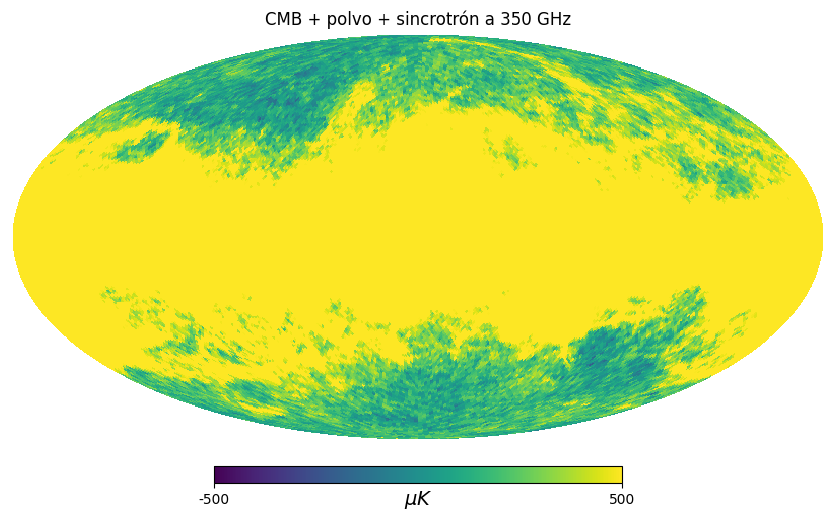

In [9]:
#uso los datos de la ultima iteración y les convierto a microK con convert_units()
sky = pysm3.Sky(nside=nside, preset_strings=["c1", "d1", "s1"], component_config=config)
mapa = sky.get_emission(freq * u.GHz) #esto está en MJy/sr
mapa_microK = mapa.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(freq * u.GHz))
hp.mollview(mapa_microK[0], title=f"CMB + polvo + sincrotrón a {freq} GHz", unit="$\mu K$", min=-500, max=500)
plt.show()  

#### Ejercicio 7:

Simule mapas en bandas similares a las de experimentos reales como Simons Observatory, QUBIC o Planck.

Comparar el grado de contaminación en distintas frecuencias.


/tmp/ipykernel_38320/75084458.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


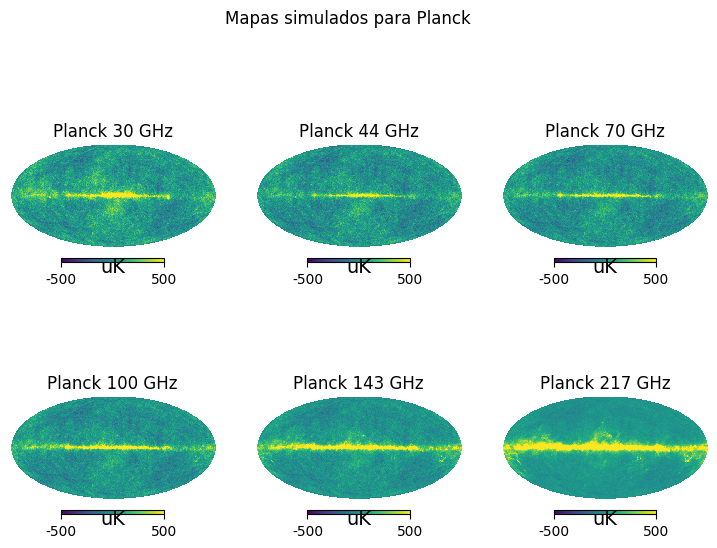

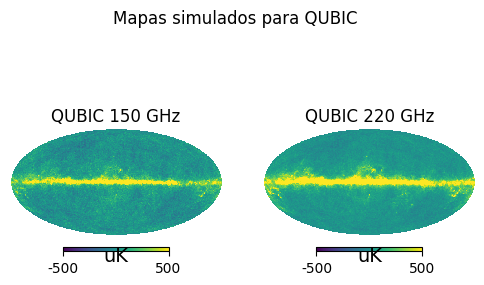

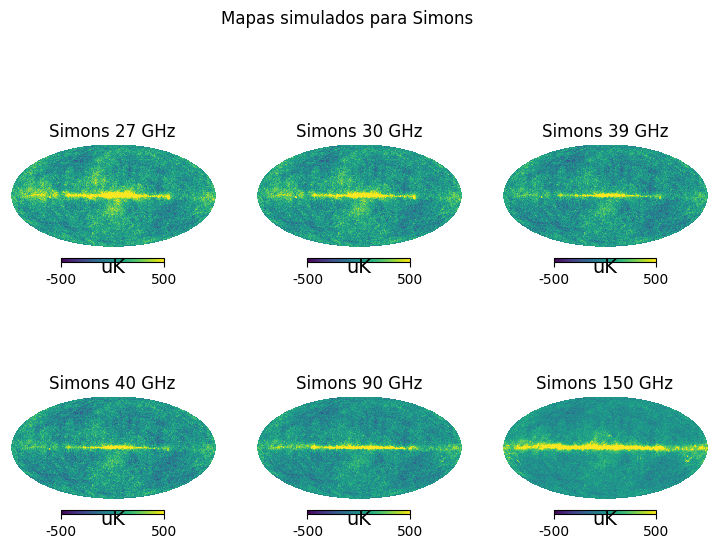

In [10]:
freq_dict = {
    "Planck": [30, 44, 70, 100, 143, 217],
    "QUBIC": [150, 220],
    "Simons": list(np.sort([30, 40, 90, 150, 27, 39]))
}

for exp_name, freqs in freq_dict.items():
    n_freqs = len(freqs)
    ncols = int(np.ceil(np.sqrt(n_freqs)))
    nrows = int(np.ceil(n_freqs / ncols))
    plt.figure(figsize=(3 * ncols, 3 * nrows))
    for idx, f in enumerate(freqs, 1):
        sky = pysm3.Sky(nside=nside, preset_strings=["c1", "s1", "d1"])
        mapa = sky.get_emission(f * u.GHz)
        plt.subplot(nrows, ncols, idx)
        hp.mollview(mapa[0], title=f"{exp_name} {f} GHz", unit="uK", min=-500, max=500, sub=(nrows, ncols, idx), hold=True)
    plt.suptitle(f"Mapas simulados para {exp_name}")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

#### Ejercicio 8:

**Separación de componentes simplificada**  

Sume varios componentes (polvo + sincrotrón) y trate de extraer uno usando diferencias de frecuencia.


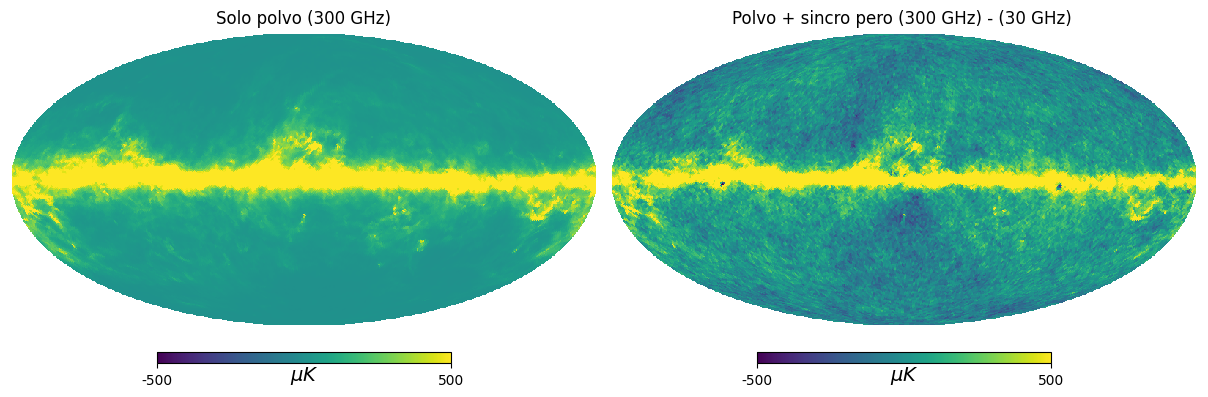

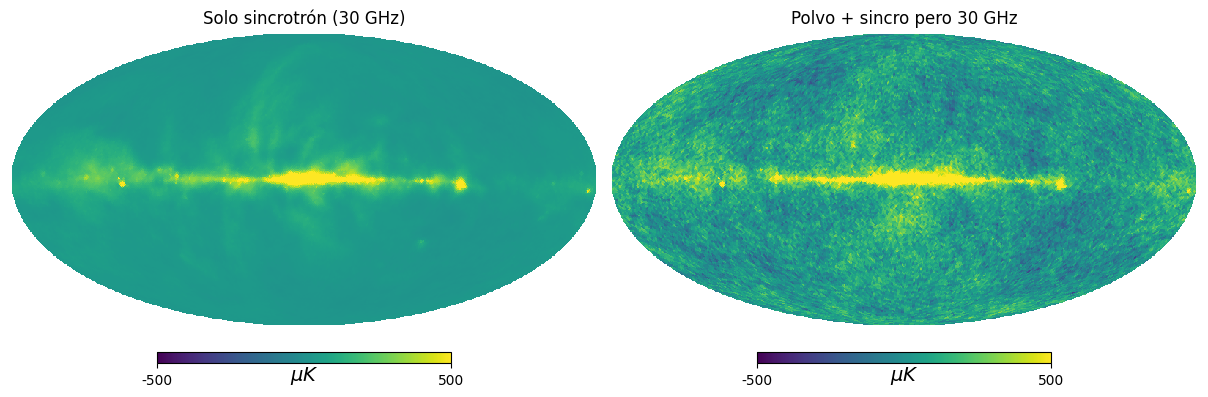

In [11]:
# polvo - alta frecuencia 
sky_dust = pysm3.Sky(nside=nside, preset_strings=["d1"])
mapa_polvo = sky_dust.get_emission(300 * u.GHz)[0] #mapa de polvo a 300 GHz

sky_both = pysm3.Sky(nside=nside, preset_strings=["c1", "s1", "d1"])
mapa_alta = sky_both.get_emission(300 * u.GHz)[0]
mapa_baja = sky_both.get_emission(30 * u.GHz)[0]
mapa_resta_polvo = mapa_alta - mapa_baja  # debería resaltar el polvo

fig = plt.figure(figsize=(12, 5))
hp.mollview(mapa_polvo, title="Solo polvo (300 GHz)", unit="$\mu K$", min=-500, max=500, fig=fig, sub=(1,2,1))
hp.mollview(mapa_resta_polvo, title="Polvo + sincro pero (300 GHz) - (30 GHz) ", unit="$\mu K$", min=-500, max=500, fig=fig, sub=(1,2,2))
plt.show()

# sincrotrón - baja frec
sky_sync = pysm3.Sky(nside=nside, preset_strings=["s1"])
mapa_sincro = sky_sync.get_emission(30 * u.GHz)[0] #mapa sincrotrón a 30 GHz

mapa_alta = sky_both.get_emission(300 * u.GHz)[0]
mapa_baja = sky_both.get_emission(30 * u.GHz)[0]
mapa_resta_sincro = mapa_baja # a bajas frecuencias el mapa es aprox solo sincrotrón

fig = plt.figure(figsize=(12, 5))
hp.mollview(mapa_sincro, title="Solo sincrotrón (30 GHz)", unit="$\mu K$", min=-500, max=500, fig=fig, sub=(1,2,1))
hp.mollview(mapa_resta_sincro, title="Polvo + sincro pero 30 GHz", unit="$\mu K$", min=-500, max=500, fig=fig, sub=(1,2,2))
plt.show()


#### Ejercicio 9:

Calcule el espectro de potencia de un mapa de foregrounds y compararlo con el del CMB (usando `healpy.anafast`).

Evalue cómo los foregrounds afectan la medición de modos B en polarización.


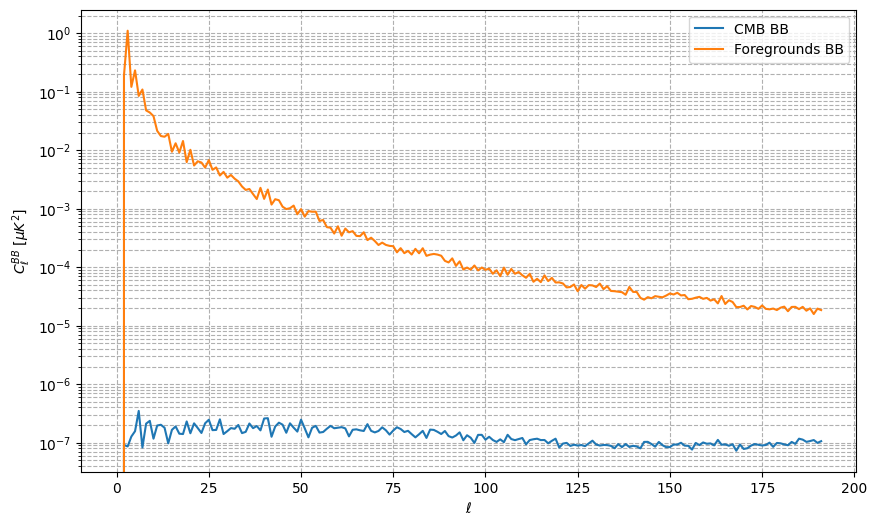

In [12]:
# Mapa de CMB puro
sky_cmb = pysm3.Sky(nside=nside, preset_strings=["c1"])
mapa_cmb = sky_cmb.get_emission(100 * u.GHz)
#mapa foregrounds
sky_fg = pysm3.Sky(nside=nside, preset_strings=["d1", "s1"])
mapa_fg = sky_fg.get_emission(100 * u.GHz)

cl_cmb = hp.anafast(mapa_cmb, pol=True)
cl_fg = hp.anafast(mapa_fg, pol=True)

ells = np.arange(len(cl_cmb[0]))

plt.figure(figsize=(10,6))
plt.plot(ells, cl_cmb[2], label="CMB BB", color="C0")  # BB = cl[2]
plt.plot(ells, cl_fg[2], label="Foregrounds BB", color="C1")
plt.yscale("log")
plt.xlabel(r"$\ell$")
plt.ylabel(r"$C_\ell^{BB}$ [$\mu K^2$]")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

se ve como el espectro de potencias es mucho mayor para aquellos mapas con sincro y polvo